In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [0]:
X = load_boston().data
Y = load_boston().target

In [0]:
# Split the Dataset in train and test, so as to fit our machine learning model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

In [0]:
# Performing data preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(np.array(X_train))
X_test = scaler.transform(np.array(X_test))

In [14]:
print("Shape of the training data: ", X_train.shape)
print("Shape of the testing data: ", X_test.shape)

Shape of the training data:  (339, 13)
Shape of the testing data:  (167, 13)


In [16]:
#Make a new train dataframe containing X_train
df_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
df_train['Price'] = list(y_train)

df_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
df_test['Price'] = list(y_test)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [0]:
# We will create a bunch of helper functions for the creation of manual SGD and plotting the results, along with the predictions
# Implement Mini-Batch SGD
# This function will take the features, learning rate( how much is to take a step of gradient descent), learning_rate_variation (constant or reduced to a certain factor),
# identical to the sklearn SGD. As far as weights are concerned we have to inialize them, hence its a not a neural network architecture, we can initialze them
# with zeros, or randomly(values should be reasonable, neither too small or large).

def sgd_optimize(X_train, y_train, lr_rate, lr_rate_variation, n_epochs, power_epoch):
    
    w = np.random.randn(13,1) #Randomly initalizing weights
    b = np.random.randn(1,1)  #Randomly picking up intercept value.
    
    for epoch in range(1,n_epochs+1):
        sum_errors = 0 #Sum of squared loss.
        N = X_train.shape[0] #The variable N in the SGD equation.

        for i in range(N):
            batch_size = np.random.randint(0,N)  # random batch size for every iteration i.e k batch_size
            X_i = X_train[batch_size,:].reshape(1,X_train.shape[1])
            y_i = y_train[batch_size].reshape(1,1)

            y_pred = np.dot(X_i,w) + b                 #y_curr = WT.X + B
            loss = y_pred - y_i                                     #w_grad = (-2/N)*(X)*(y-(WT.X+B)) = (-2/N)*(X) * loss 
            sum_errors += loss**2                                   #b_grad = (-2/N)*(y-(WT.X+B)) = (-2/N) * loss

            w_grad = X_i.T.dot((y_pred - y_i))
            b_grad = (y_pred - y_i)

            w = w -(2/N)*lr_rate*(w_grad)
            b = b - (2/N)*lr_rate*(b_grad)

        print("Epoch: %d, Loss: %.3f" %(epoch, sum_errors/N))

        if(lr_rate_variation=='invscaling'): #Implementing learning_rate 'invscaling' similar to that present in SGD Regressor.
            lr_rate = lr_rate / pow(epoch, power_epoch)
        else:
            pass

    return w, b

In [0]:
# The following function will be used for predictions

def predict(X_test, w_coeff, b_coeff):
    X_test=np.array(X_test)
    y_pred =[]
    for i in range(0,len(X_test)):
        y=np.asscalar(np.dot(w_coeff,X_test[i]) + b_coeff) #Convert an array of size 1 to its scalar equivalent.
        y_pred.append(y)
    return np.array(y_pred)

In [0]:
#This function is used to compare the distribution of the actual values and predicted values.

def plot_distribution(y_test,y_pred):
    import seaborn as sns
    dataset=pd.DataFrame(y_test,columns=['Actual_Y'])
    dataset['Predcited_Y']=y_pred
    plt.figure(figsize=(12,12))
    sns.distplot(y_test, label = "Actual Y", color = 'red')
    sns.distplot(y_pred, label = "Predcited Y" , color = 'blue' )
    plt.legend()
    plt.show()
    
#This function is used to plot the scatter plot between actual and predicted y.
def plot_scatter(y_test,y_pred):
    plt.scatter(y_test,y_pred)
    plt.title('Scatter plot between Actual and Predicted Y.')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()

    #Get the mean squared error between the predicted and the actual values.   
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error between Actual and Predicted values: ',mse)
    return mse

#Plot a chart of predicted values Vs actual values.    
def plot_chart(y_test,y_pred):
    data=[y_test,y_pred]
    labels=["Actual Y","Predicted Y"]
    x_axes = np.arange(0,len(list(y_test)))
    color_map = ['red','blue']
    plt.figure(figsize=(30,5))
    for index in range(0,len(data)):
        plt.plot(x_axes, data[index], color=color_map[index], label=labels[index])
    plt.xlabel('Data Points')
    plt.ylabel('Class Values')
    plt.title("Comparison between the predicted and actual values.")
    plt.legend()
    plt.show()

In [21]:
#Get the optimal value of the w  and b Learning Rate is contant here
w_optimal, b_optimal = sgd_optimize(X_train, y_train, lr_rate=0.01, lr_rate_variation='constant', n_epochs=500, power_epoch=None) # bias term can be ignored here
weights_df = pd.DataFrame(w_optimal, columns=["SGD + Constant LR"])

Epoch: 1, Loss: 626.560
Epoch: 2, Loss: 592.418
Epoch: 3, Loss: 542.288
Epoch: 4, Loss: 507.101
Epoch: 5, Loss: 496.997
Epoch: 6, Loss: 446.355
Epoch: 7, Loss: 468.363
Epoch: 8, Loss: 438.645
Epoch: 9, Loss: 436.596
Epoch: 10, Loss: 416.315
Epoch: 11, Loss: 389.500
Epoch: 12, Loss: 387.339
Epoch: 13, Loss: 358.494
Epoch: 14, Loss: 350.360
Epoch: 15, Loss: 338.781
Epoch: 16, Loss: 306.501
Epoch: 17, Loss: 306.817
Epoch: 18, Loss: 299.630
Epoch: 19, Loss: 282.099
Epoch: 20, Loss: 300.789
Epoch: 21, Loss: 256.832
Epoch: 22, Loss: 274.345
Epoch: 23, Loss: 274.775
Epoch: 24, Loss: 236.579
Epoch: 25, Loss: 247.034
Epoch: 26, Loss: 214.102
Epoch: 27, Loss: 207.349
Epoch: 28, Loss: 216.507
Epoch: 29, Loss: 216.081
Epoch: 30, Loss: 209.020
Epoch: 31, Loss: 209.774
Epoch: 32, Loss: 176.222
Epoch: 33, Loss: 182.478
Epoch: 34, Loss: 164.102
Epoch: 35, Loss: 178.631
Epoch: 36, Loss: 159.718
Epoch: 37, Loss: 148.290
Epoch: 38, Loss: 155.899
Epoch: 39, Loss: 125.682
Epoch: 40, Loss: 128.397
Epoch: 41

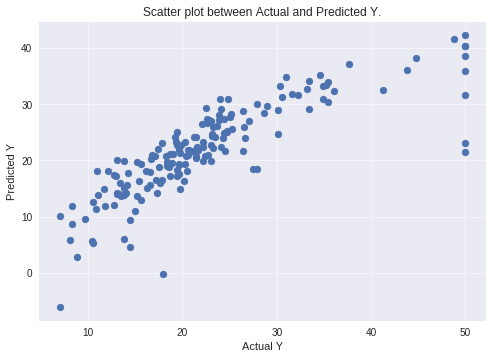

Mean Squared Error between Actual and Predicted values:  29.021323223637143


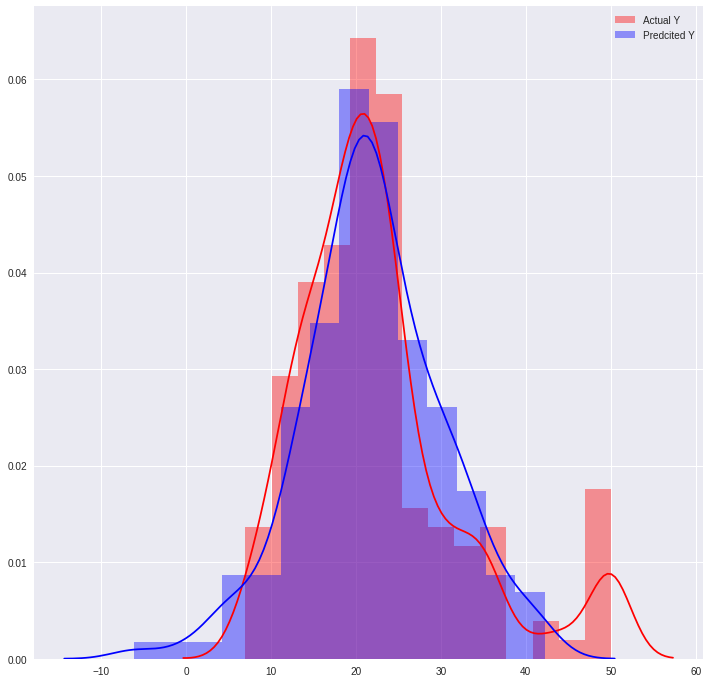

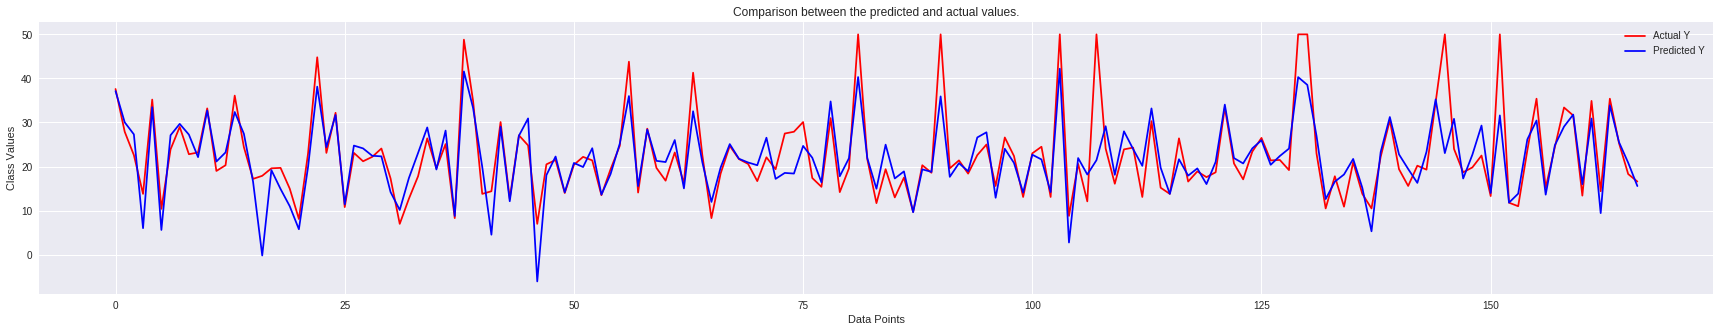

In [22]:
#Predict the class labels of the test set using the optimal values obtained from the previous step.
y_pred = predict(X_test, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse1=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

**Observations :  The predicted and actual values are not that far away from each other.**

In [23]:
# Learning Rate is not constant

#Get the optimal value of the w coefficients and b coefficients.
w_coeff_optimal, b_coeff_optimal = sgd_optimize(X_train, y_train, lr_rate=1, lr_rate_variation='invscaling', n_epochs=500, power_epoch=0.25)
weights_df["SGD + Variable LR"] = pd.DataFrame(w_coeff_optimal)

Epoch: 1, Loss: 168.667
Epoch: 2, Loss: 29.244
Epoch: 3, Loss: 27.660
Epoch: 4, Loss: 23.170
Epoch: 5, Loss: 19.700
Epoch: 6, Loss: 20.680
Epoch: 7, Loss: 20.653
Epoch: 8, Loss: 20.889
Epoch: 9, Loss: 19.919
Epoch: 10, Loss: 18.343
Epoch: 11, Loss: 13.398
Epoch: 12, Loss: 18.827
Epoch: 13, Loss: 15.654
Epoch: 14, Loss: 28.007
Epoch: 15, Loss: 17.521
Epoch: 16, Loss: 20.781
Epoch: 17, Loss: 22.765
Epoch: 18, Loss: 19.629
Epoch: 19, Loss: 16.763
Epoch: 20, Loss: 19.134
Epoch: 21, Loss: 14.432
Epoch: 22, Loss: 19.575
Epoch: 23, Loss: 24.461
Epoch: 24, Loss: 25.387
Epoch: 25, Loss: 21.088
Epoch: 26, Loss: 21.673
Epoch: 27, Loss: 21.693
Epoch: 28, Loss: 19.639
Epoch: 29, Loss: 18.182
Epoch: 30, Loss: 20.017
Epoch: 31, Loss: 19.105
Epoch: 32, Loss: 19.265
Epoch: 33, Loss: 22.934
Epoch: 34, Loss: 20.760
Epoch: 35, Loss: 20.770
Epoch: 36, Loss: 27.332
Epoch: 37, Loss: 18.639
Epoch: 38, Loss: 18.193
Epoch: 39, Loss: 24.502
Epoch: 40, Loss: 18.970
Epoch: 41, Loss: 18.826
Epoch: 42, Loss: 18.750


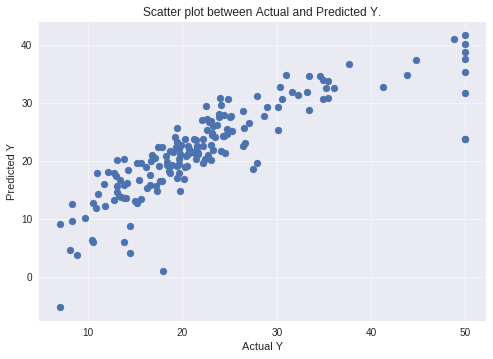

Mean Squared Error between Actual and Predicted values:  28.331720655283423


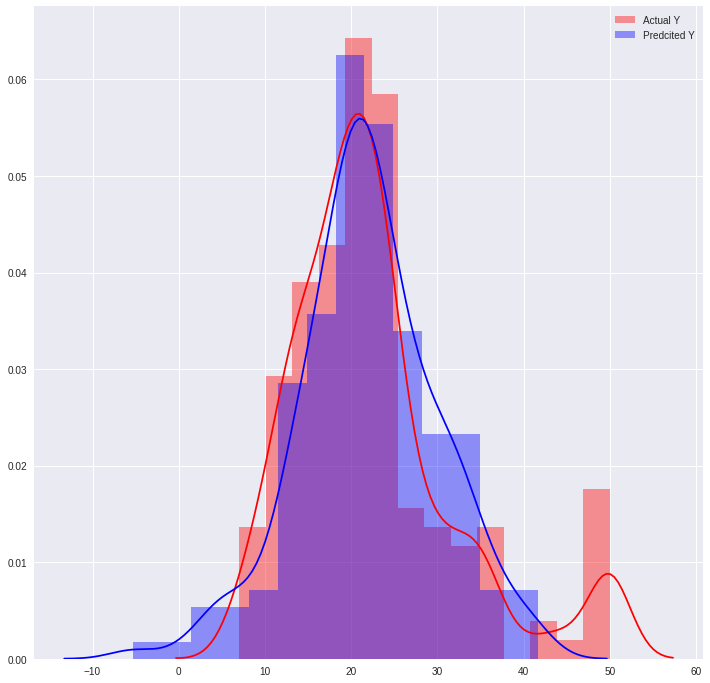

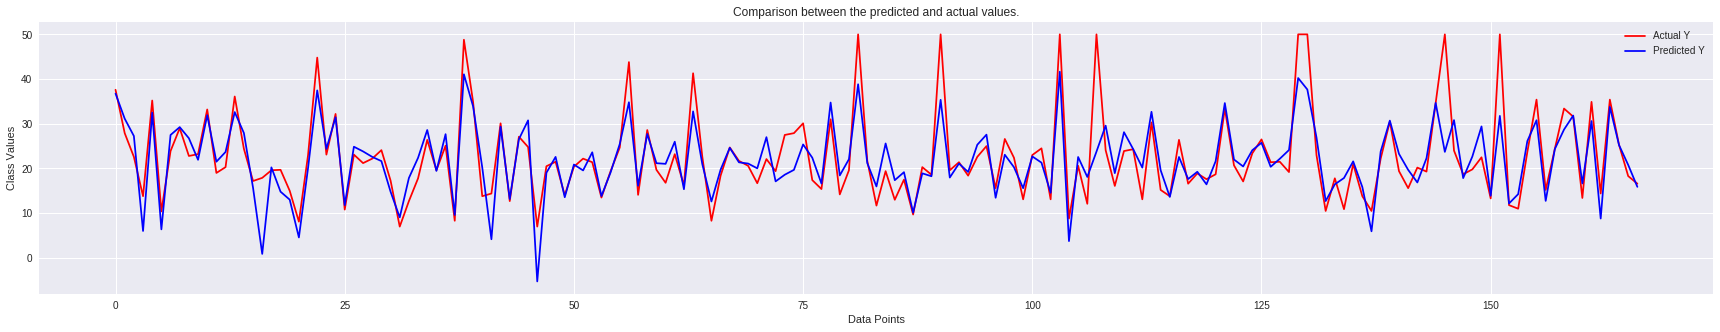

In [24]:
#Predict the class labels of the test set using the optimal values obtained from the previous step.
y_pred = predict(X_test, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse2=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

**Observations : This shows our custom implementation with 'invscaling' is better than 'constant' learning rate implementation**

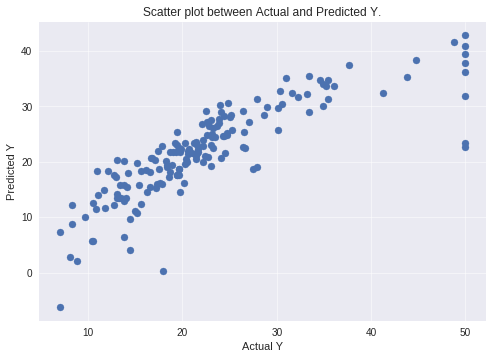

Mean Squared Error between Actual and Predicted values:  28.51475642914352


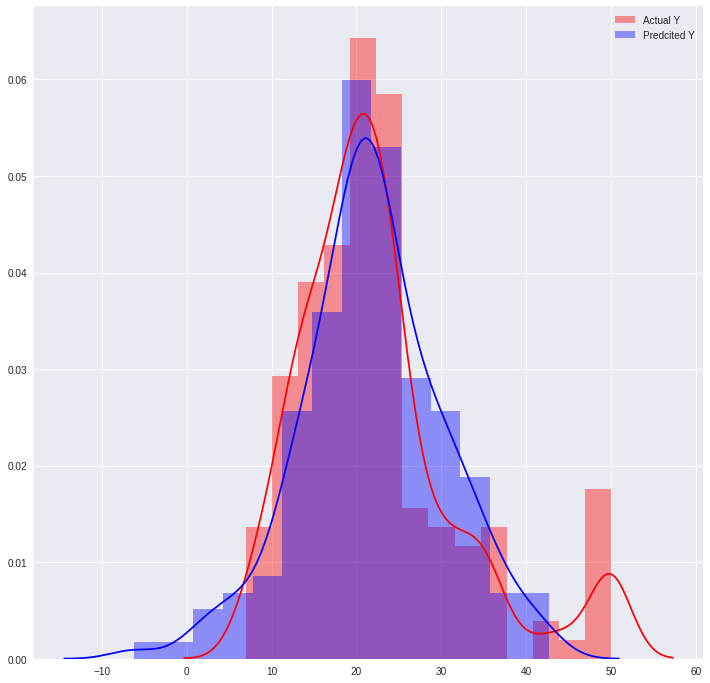

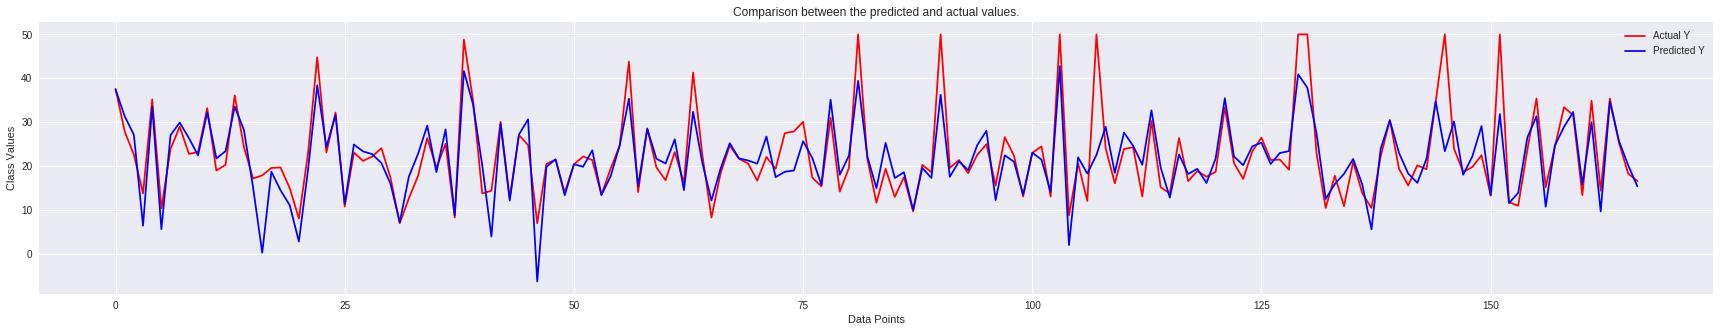

In [29]:
clf = SGDRegressor(loss='squared_loss', alpha=0.0001, random_state=0, learning_rate='invscaling', eta0=0.001, power_t=0.25, max_iter=5000)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)    

weights_df["SKLEARN SGD Regressor"] = pd.DataFrame(clf.coef_)

#Draw the scatter plot
mse3=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

In [30]:
# Model's weight Comparison

weights_df.head()

,SGD + Constant LR,SGD + Variable LR,SKLEARN SGD Regressor
0,-1.204054,-1.202776,-1.307748
1,0.658202,0.951610,0.855577
2,-0.431601,-0.416221,-0.189860
3,0.203040,0.126317,0.192881
4,-0.927615,-1.133504,-1.484312


In [32]:
#Display the Mean Squared Error gor all the 3 models.
print("MSE, Custom SGD + Constant Learning Rate: ",mse1)
print("MSE, Custom SGD + Variable Learning Rate: ",mse2)
print("MSE, Sklerns SGD Regressor :              ",mse3)

MSE, Custom SGD + Constant Learning Rate:  29.021323223637143
MSE, Custom SGD + Variable Learning Rate:  28.331720655283423
MSE, Sklerns SGD Regressor :               28.51475642914352
